# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution **1p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**


- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. - Optional

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. - Optional

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. - Optional

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. - Optional

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. - Optional

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [1]:
import pandas as pd

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32444,51,Private,101432,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
28083,28,Private,214702,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,<=50K
16523,79,?,163140,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,>50K
12863,44,Federal-gov,399155,HS-grad,9,Never-married,Craft-repair,Own-child,Black,Female,0,0,40,United-States,<=50K
17109,25,Private,190350,HS-grad,9,Never-married,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K
17810,43,Private,350379,5th-6th,3,Divorced,Priv-house-serv,Unmarried,White,Female,0,0,40,Mexico,<=50K
4089,23,Private,449432,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
10861,43,Private,174196,HS-grad,9,Never-married,Other-service,Unmarried,Black,Female,0,0,40,United-States,<=50K
18159,42,Private,139012,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,Taiwan,>50K
1243,65,Self-emp-not-inc,167414,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,59,United-States,>50K


In [3]:
#Primul pas este importarea librariilor necesare analizei

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

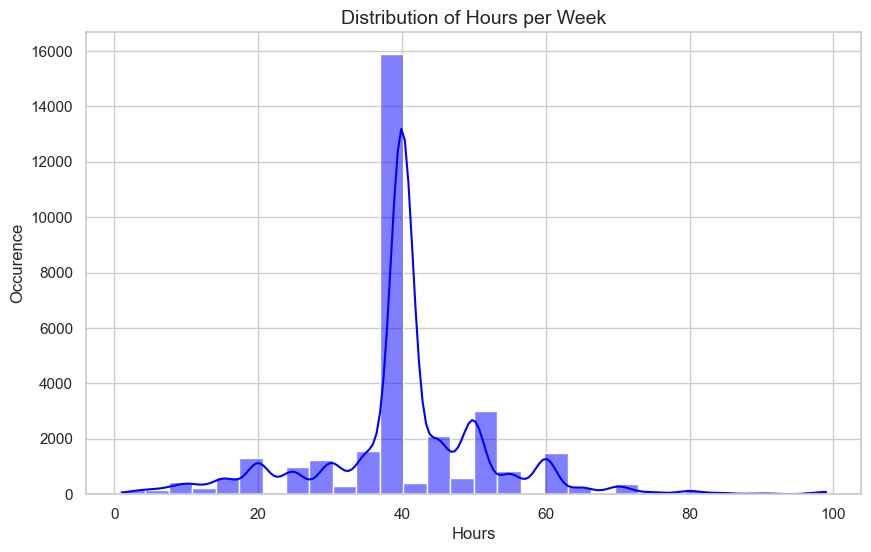

In [4]:
#Voi incepe cu generarea distributiei targetului, care indica vizual skewness-ul si existenta outlierilor

sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='hours-per-week', kde=True, bins=30, color='blue')

#Pentru labels avem urmatoarele

plt.title('Distribution of Hours per Week', fontsize=14)
plt.xlabel('Hours')
plt.ylabel('Occurence')

plt.show()

In [5]:
#Alaturi de acasta histograma, detaliile despre distributie vor permite o analiza mai clara a fenomenului
summary = data.describe().T
summary['median'] = data.select_dtypes(include=[np.number]).median()
print(summary[['mean', 'median', 'std', 'min', 'max']])

                         mean    median            std      min        max
age                 38.581647      37.0      13.640433     17.0       90.0
fnlwgt          189778.366512  178356.0  105549.977697  12285.0  1484705.0
education-num       10.080679      10.0       2.572720      1.0       16.0
capital-gain      1077.648844       0.0    7385.292085      0.0    99999.0
capital-loss        87.303830       0.0     402.960219      0.0     4356.0
hours-per-week      40.437456      40.0      12.347429      1.0       99.0


## Analiza intermediara
#### 1. Referitor la datele numerice care NU sunt target, putem spune urmatoarele: pentru varsta, cu mediana de 37 si media de 38.6 sugereaza o asimetrie pozitiva; iar raportul dintre capital gain si loss in ceea ce priveste deviatia standard indica prezenta outlierilor, asa cum vedem si valoarea maxima de 99999

#### 2. In ceea ce priveste targetul, vedem cum media si mediana sunt aproape egale, dar distributia din histograma face vizibila existenta outlierilor de 1 si 99 de ore, asa cum apare si in tabel

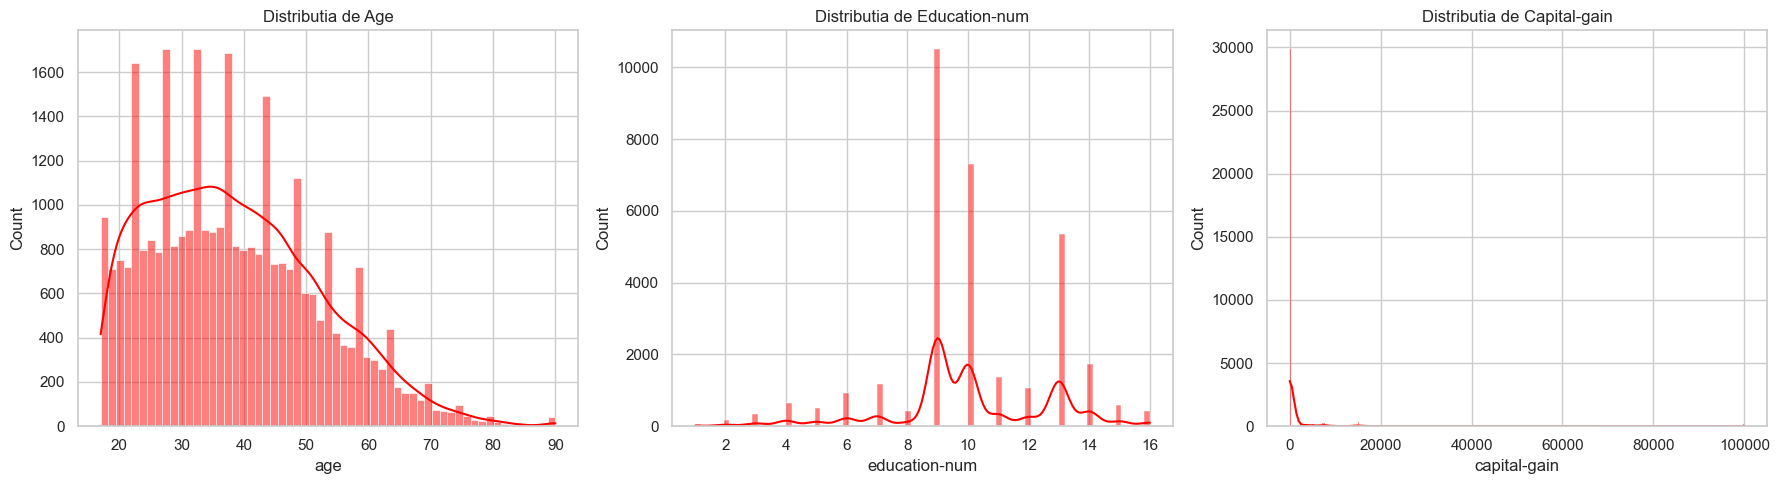

In [7]:
#Voi genera histograme si pentru celelalte valori numerice pentru vizibilitate
coloane = ['age', 'education-num', 'capital-gain']
fig, axes = plt.subplots(1, 3, figsize=(18,5))

for i, col in enumerate(coloane):
    sns.histplot(data=data, x=col, kde=True, ax=axes[i], color='red')
    axes[i].set_title(f'Distributia de {col.capitalize()}')

plt.tight_layout()
plt.show()

#Aici vedem pentru capital gain asimetrie ridicata
#Distributia anilor de educatie este multimodala si vedem cum se fixeaza in functie de cilul de studiu (liceu, licenta, etc)

In [13]:
#Verificarea datelor lipsa
date_lipsa = data.isnull().sum()
procent_lipsa = (date_lipsa/len(data)) * 100
raport = pd.DataFrame({'Missing values in the database': date_lipsa, 'Percentage of Missing Values (%)': procent_lipsa})
print(raport)

                Missing values in the database  \
age                                          0   
workclass                                    0   
fnlwgt                                       0   
education                                    0   
education-num                                0   
marital-status                               0   
occupation                                   0   
relationship                                 0   
race                                         0   
sex                                          0   
capital-gain                                 0   
capital-loss                                 0   
hours-per-week                               0   
native-country                               0   
income                                       0   

                Percentage of Missing Values (%)  
age                                          0.0  
workclass                                    0.0  
fnlwgt                                       0

In [16]:
#Raportul prezinta 0 valori lipsa, DAR stim ca in date exista celule cu valoarea '?', vom rezolva astfel situatia si refacem raportul
data.replace({'?': np.nan}, inplace=True)

In [17]:
#Verificarea datelor lipsa
date_lipsa1 = data.isnull().sum()
procent_lipsa1 = (date_lipsa1/len(data)) * 100
raport1 = pd.DataFrame({'Missing values in the database': date_lipsa1, 'Percentage of Missing Values (%)': procent_lipsa1})
print(raport1)

                Missing values in the database  \
age                                          0   
workclass                                 1836   
fnlwgt                                       0   
education                                    0   
education-num                                0   
marital-status                               0   
occupation                                1843   
relationship                                 0   
race                                         0   
sex                                          0   
capital-gain                                 0   
capital-loss                                 0   
hours-per-week                               0   
native-country                             583   
income                                       0   

                Percentage of Missing Values (%)  
age                                     0.000000  
workclass                               5.638647  
fnlwgt                                  0.0000

In [18]:
#Astfel vedem cum exista miss-uri de sub 6% in baza de date

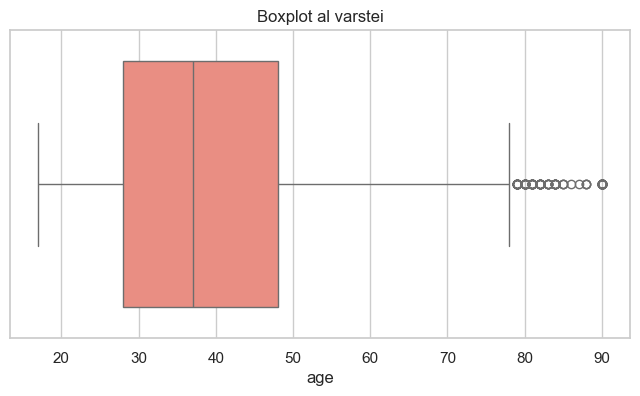

In [19]:
plt.figure(figsize=(8,4))
sns.boxplot(x=data['age'], color='salmon')
plt.title('Boxplot al varstei')
plt.show()

#### Pentru varsta vedem cum exista entry-uri de persoane peste 75-76 de ani, sugeranc outlieri in varsta

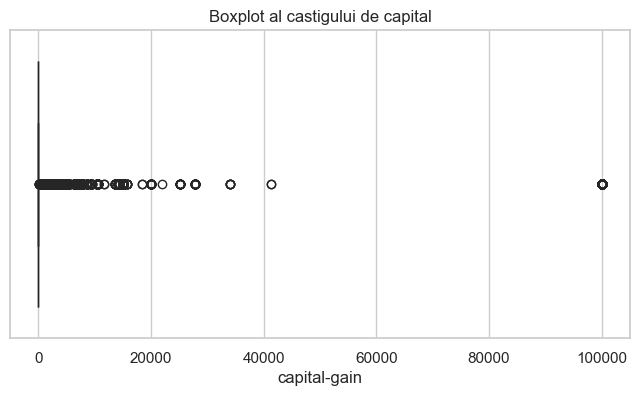

In [20]:
plt.figure(figsize=(8,4))
sns.boxplot(x=data['capital-gain'], color='green')
plt.title('Boxplot al castigului de capital')
plt.show()

#### Putem observa valoarea inregistrata de 99999, care a fost identificata de la prima analiza de outliers

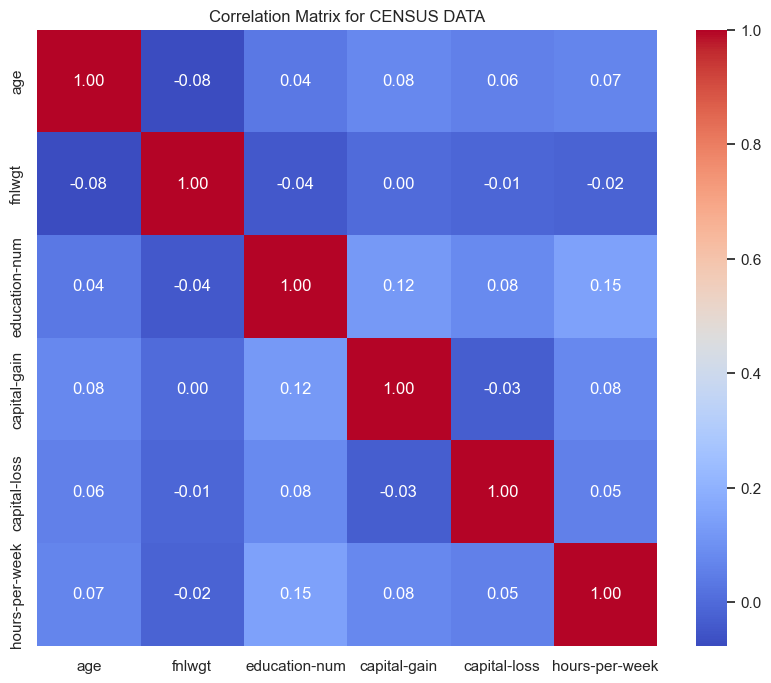

In [21]:
#Pentru o EDA realizata cu acuratete, voi genera si o matrice de corelatie a valorilor numerice
plt.figure(figsize=(10,8))
matrix = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for CENSUS DATA')
plt.show()

## Analiza intermediara
#### Nu exista corelatii semnificative intre variabilele bazei de date, dar cele mai puternice legaturi pot fi vazute intre anii de educatie si orele de lucru pe saptamana; merita mentiunea unor relatii slabe (totusi nesemnificative) intre capital gain si varsta cu privire la targetul de ore de lucru. Cea mai slaba legatura este cu fnlwgt, nu este un predictor bun pentru target

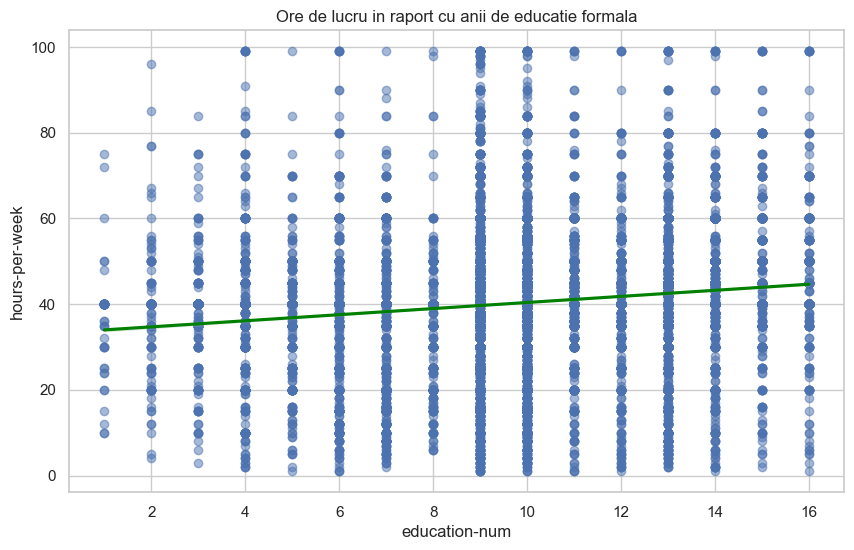

In [22]:
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='education-num', y='hours-per-week', scatter_kws={'alpha':0.5}, line_kws={'color':'green'})
plt.title('Ore de lucru in raport cu anii de educatie formala')
plt.show()

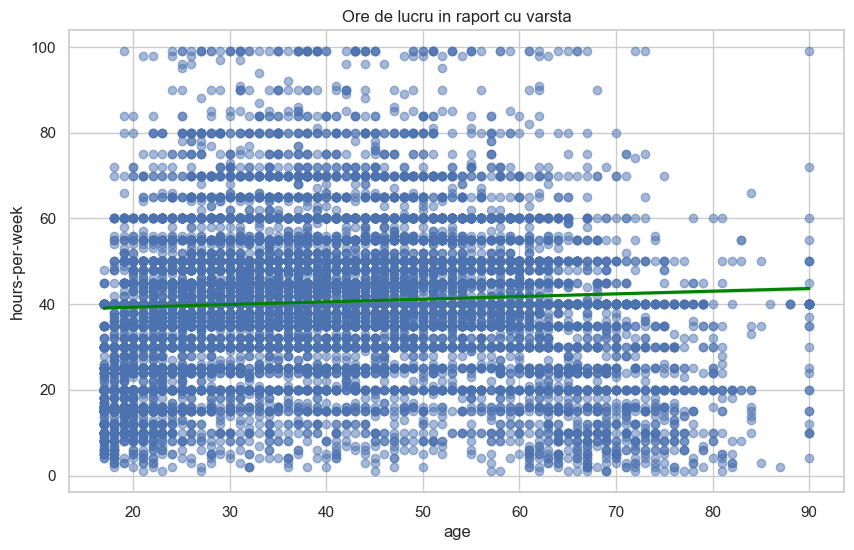

In [23]:
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='age', y='hours-per-week', scatter_kws={'alpha':0.5}, line_kws={'color':'green'})
plt.title('Ore de lucru in raport cu varsta')
plt.show()

In [25]:
print('Skewness al valorilor de ore de lucru:', data['hours-per-week'].skew())

Skewness al valorilor de ore de lucru: 0.227642536804501


# SUMMARY REPORT
#### 1. Trei variabile prezente au sub 6% informatie lipsa, in functie de necesitatea lor, acestea pot fi inlocuite cu o variabila precum 'Unknown' pentru standardizare. Acestea pot fi: fie erori, fie aretefacte din timpul realizarii bazei de date, desi pot indica un fenomen, daca valorile lipsa se regasesc pentru indivizi care nu lucreaza.
#### 2. Capital gain si loss prezinta multe valori nule, pasii de standardizare a variabilei din Task 1 ar ajuta in aceasta situatie
#### 3. Distributia orelor de lucru ramane relativ stabila la 40, cu media (40,43) si mediana (40) apropiate ca valori, Skewnees-ul pozitiv indica asimetrie pozitiva spre dreapta, vizibila si din histograma
#### 4. In urma matricei de corelatie, putem sugera ca educatia si varsta ar putea descrie cel mai bine valoarea target
#### 5. Recomandari: Pe langa standardizarea variabilelor cu outliers, vedem cum variabila fnlwgt nu ar fi utila in analiza; pentru a evita redundanta, aceasta poate fi inlaturata